# 주성분 분석

100 * 100 픽셀의 이미지 파일은 10000개의 차원을 가진다.

이렇게 많은 차원을 축소할 수 있으면 자원을 절약할 수 있다.

차원 축소 알고리즘중 하나가 주성분 분석(PCA) 이다.

- 일반적으로 주성분은 원본 특성의 개수와 샘플 개수중 작은 값 만큼 찾을 수 있다.
- 비지도 학습은 대량의 데이터에서 수행하기 때문에 원본 특성의 개수만큼 찾을 수 있다.

### PCA 클래스

In [4]:
import numpy as np

# 데이터 로드
fruits = np.load('data.npy')
fruits.shape

fruits_2d = fruits.reshape(300,-1)

- PCA 클래스 임포트

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50) #주성분의 개수
pca.fit(fruits_2d)

PCA(n_components=50)

- 주성분 확인

In [7]:
pca.components_.shape

(50, 10000)

- `n_components`를 50으로 지정했기 때문에 첫번째 차원이 50이다.
- 두번째 차원은 원본데이터의 특성 개수인 10000이다.

In [21]:
# 시각화 함수 정의
import matplotlib.pyplot as plt

def vis(data):
    n = len(data)

    rows = int(np.ceil(n/10))
    columns = 10
    fig, axs = plt.subplots(rows, columns, figsize= (10, rows))

    for i in range(rows):
        for j in range(columns):
            idx = i * 10 + j
            axs[i, j].axis('off')
            if idx >= n :
                continue
            axs[i, j].imshow(data[idx], cmap='gray_r')

- 주성분 시각화

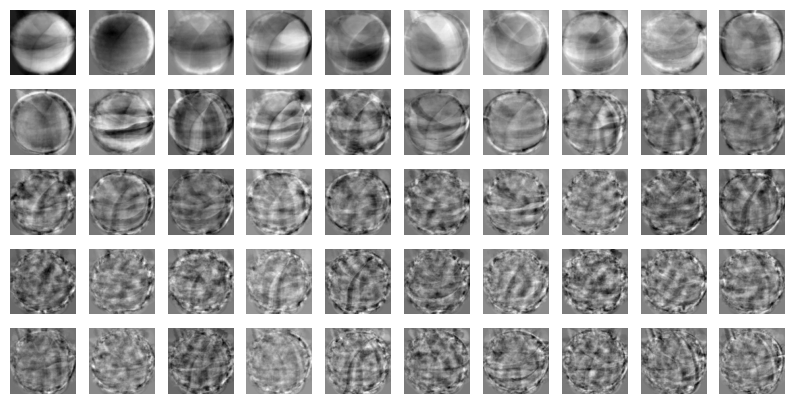

In [22]:
vis(pca.components_.reshape(-1, 100, 100))

- 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것이다.
- 데이터 셋에서의 어떤 특징을 잡아낸것처럼 생각할 수 있다.

### 원본데이터 차원 축소

In [25]:
print(fruits_2d.shape)
fruits_transform = pca.transform(fruits_2d)
print(fruits_transform.shape)

(300, 10000)
(300, 50)


- 원본 데이터를 재구성 할 수 있다. 어느정도 정보손실이 발생할 수 밖에 없다.

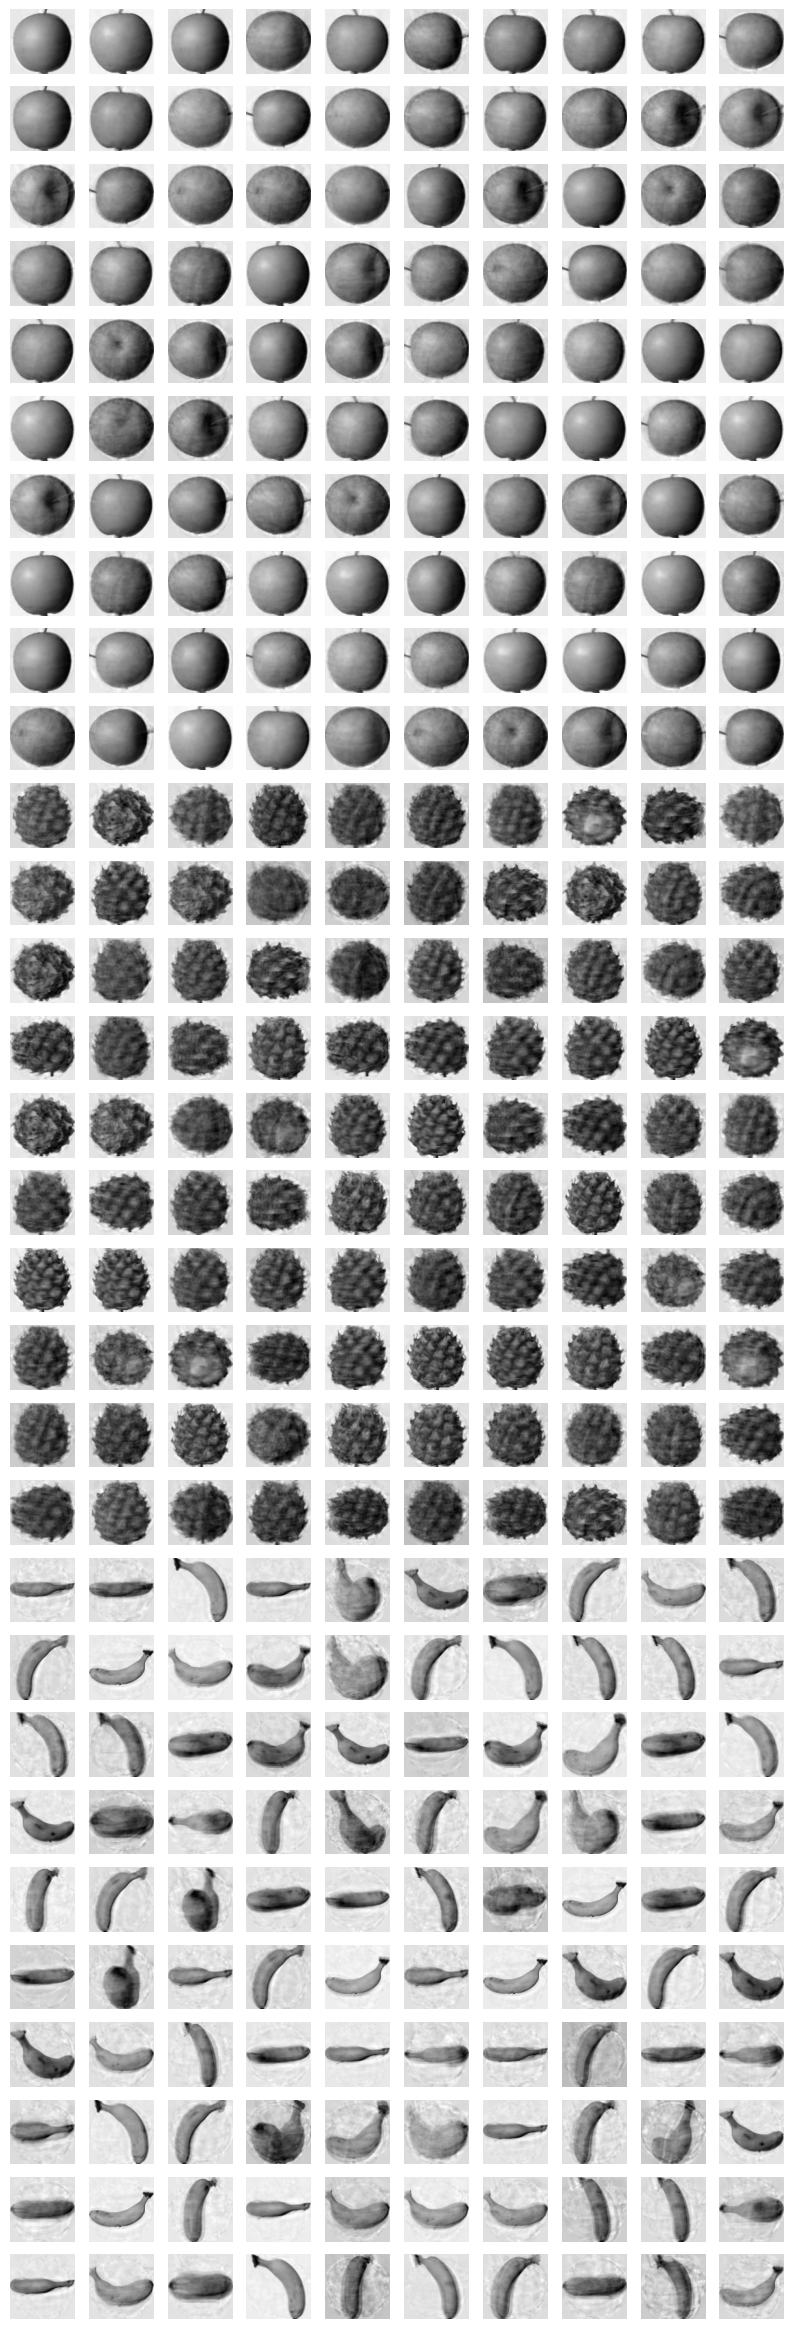

In [29]:
fruits_inverse = pca.inverse_transform(fruits_transform)
vis(fruits_inverse.reshape(-1, 100, 100))

### 설명된 분산

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 설명된 분산(explained variance)라고 한다.

- PCA 클래스의 `explained_variance_ratio_`에 각 주성분의 설명된 분산 비율이 기록되어 있다.
- 이 분산 비율을 모두 더하면 총 분산 비율을 얻을 수 있다.

In [32]:
# 분산 비율
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645189 0.00578896 0.00511202
 0.00486377 0.00480345 0.00447837 0.00437315 0.00408032 0.00389476
 0.00372444 0.00359277 0.00331454 0.00317827 0.00304345 0.00303722
 0.00288865 0.0027588  0.00264717 0.00255949 0.00252083 0.00247162
 0.00239053 0.00230957 0.0022094  0.0021684  0.00213678 0.00196042
 0.00190995 0.00185981 0.00182625 0.00181524 0.00172972 0.00169772
 0.00161401 0.00159835]
0.9214501604761063


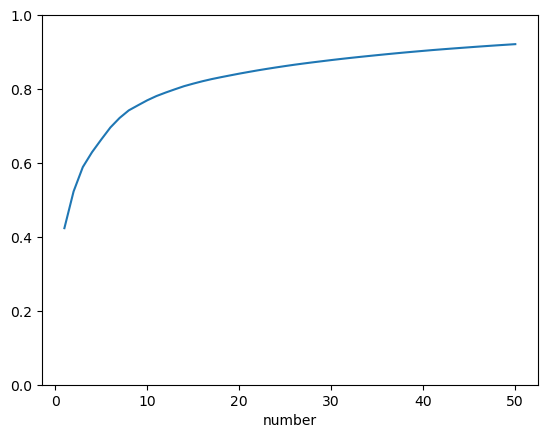

In [35]:
# 주성분 비율 시각화
data = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, 51), data)
plt.xlabel('number')
plt.ylim(0, 1)
plt.show()

### 다른 알고리즘과 함께 사용해보기

- 차원축소 이전

In [65]:
from sklearn.model_selection import train_test_split

fruit_target = np.array([0] * 100 + [1] * 100 + [2] * 100)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr = LogisticRegression()
scores = cross_validate(lr, fruits_2d, fruit_target, return_train_score=True)

print(np.mean(scores['fit_time']))
print(scores['train_score'])
print(scores['test_score'])

original_time_fit = np.sum(scores['fit_time'])

0.5016513347625733
[1. 1. 1. 1. 1.]
[1.         1.         1.         0.98333333 1.        ]


- 차원축소 이후

In [68]:
lr = LogisticRegression()
scores = cross_validate(lr, fruits_transform, fruit_target, return_train_score=True)

print(np.mean(scores['fit_time']))
print(scores['train_score'])
print(scores['test_score'])

transformed_time_fit = np.sum(scores['fit_time'])

print(original_time_fit/transformed_time_fit)

0.008353996276855468
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]
60.04926482339779


In [ ]:
# 시간이 50배 이상 빨라진것을 볼 수 있다.

### 적은 차원비율로 훈련하기
- PCA 클래스의 n_componets 를 0~1 사이의 실수로 지정하면 분산 비율을 지정할수 있다.

In [74]:
pca = PCA(n_components=0.5) # 50%의 분산비율만을 확보

pca.fit(fruits_2d)
print(pca.components_.shape) # 확보된 주성분의 수
print(np.sum(pca.explained_variance_ratio_)) # 52.3 의 분산 비율이 설명됐다.

(2, 10000)
0.52298772458006


In [83]:
lr = LogisticRegression()
fruits_reduced = pca.transform(fruits_2d)

scores = cross_validate(lr, fruits_reduced, fruit_target, return_train_score=True)

print(np.mean(scores['fit_time']))
print(scores['train_score'])
print(scores['test_score'])  # 두개의 차원만 사용해도 높은 점수를 얻는다.

c:\Users\fdsaf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\fdsaf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.012248945236206055
[1. 1. 1. 1. 1.]
[0.98333333 1.         1.         0.98333333 1.        ]


c:\Users\fdsaf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- K-평균 알고리즘

In [90]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(fruits_reduced)
print(km.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


c:\Users\fdsaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fdsaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [91]:
# 각 라벨별로 시각화
label_0, label_1, label_2 = [fruits[km.labels_ == i]for i in range(3)]

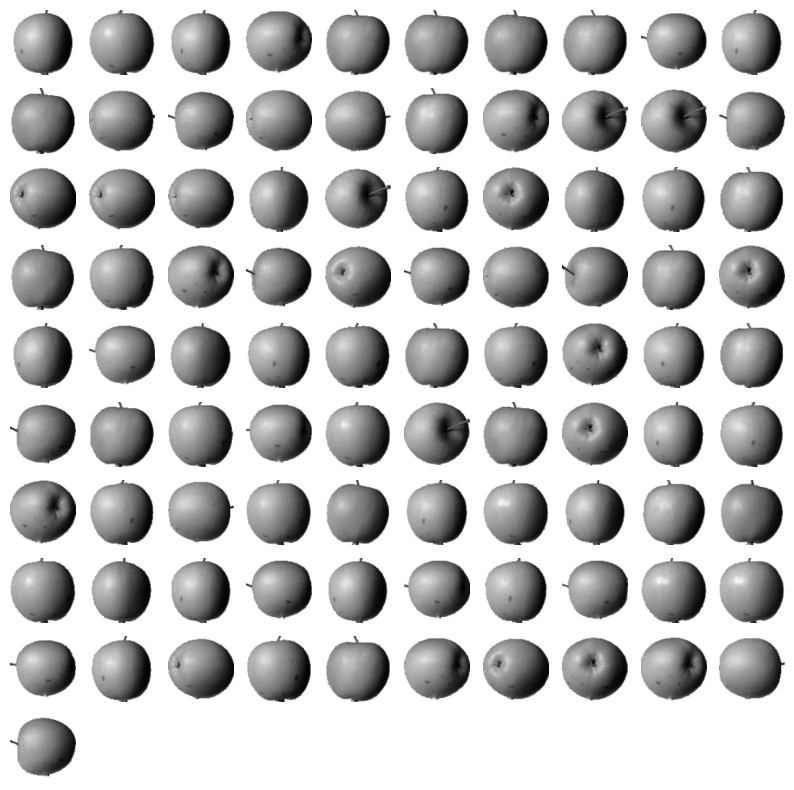

In [92]:
vis(label_0)

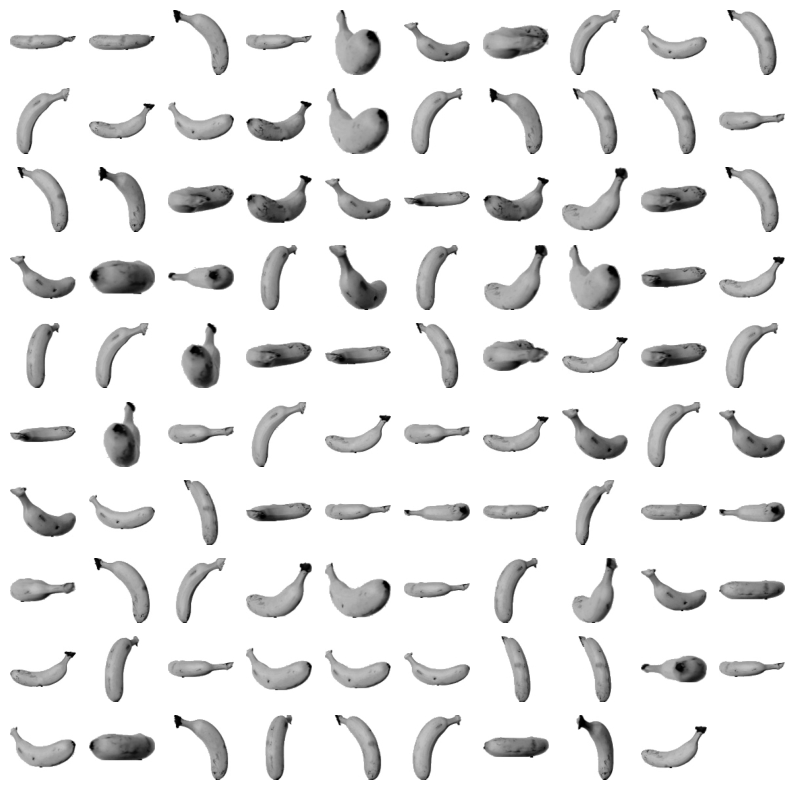

In [93]:
vis(label_1)

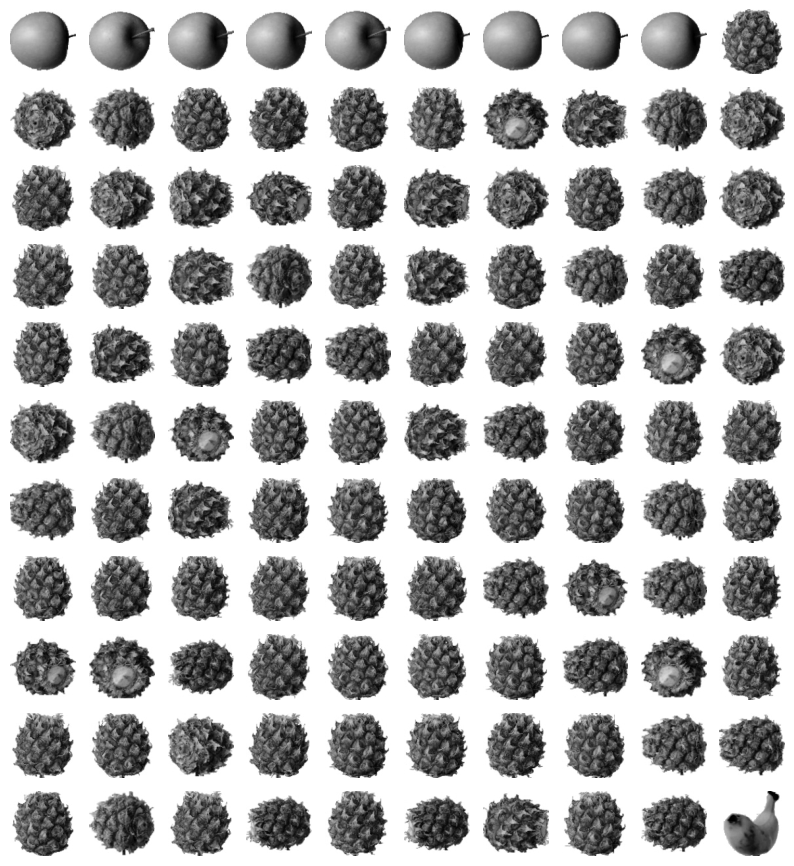

In [94]:
vis(label_2)

- 원본과의 비교

In [99]:
import pandas as pd
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)
display(pd.DataFrame(km.labels_).value_counts())
km.fit(fruits_reduced)
display(pd.DataFrame(km.labels_).value_counts())

c:\Users\fdsaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fdsaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0    111
1     98
2     91
Name: count, dtype: int64

c:\Users\fdsaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fdsaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0    110
1     99
2     91
Name: count, dtype: int64

- 확인하면 차이가 거의 없다.

- 2차원이므로 시각화가 가능하다.

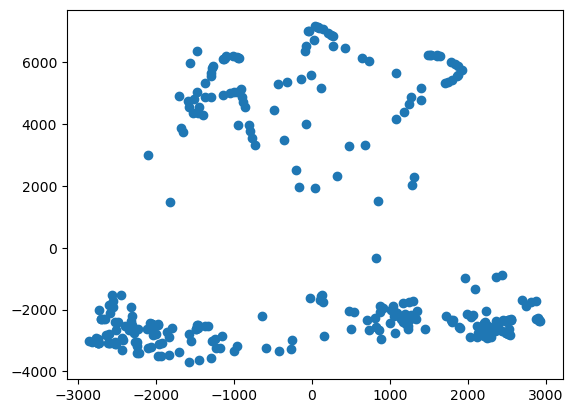

In [107]:
plt.scatter(fruits_reduced[:, 1], # 두번쨰 주성분
         fruits_reduced[:, 0]  # 첫번째 주성분
)

c:\Users\fdsaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fdsaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


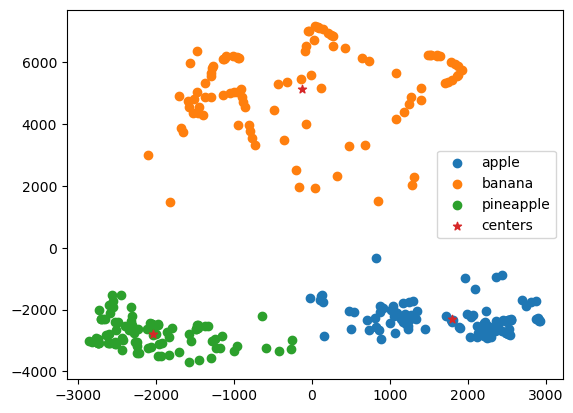

In [115]:
km = km.fit(fruits_reduced)
for label in range(3):
    data = fruits_reduced[km.labels_==label]
    plt.scatter(data[:, 1], data[:, 0])

plt.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:, 0], marker='*')
plt.show()

c:\Users\fdsaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fdsaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


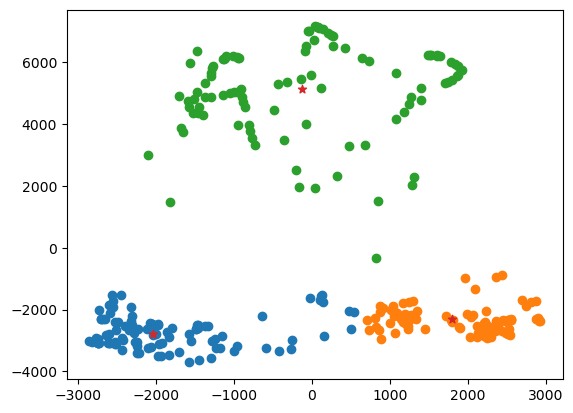

In [116]:
km = km.fit(fruits_reduced)
for i in range(3):
    fruits_reduced
    plt.scatter(fruits_reduced[i * 100: (i + 1)* 100, 1], fruits_reduced[i * 100: (i + 1)*100, 0])

plt.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:, 0], marker='*')
plt.show()